In [1]:
library(tidytext)
library(janeaustenr)
library(stringr)
library(tidyr)
library(ggplot2)
library(wordcloud)
library(RColorBrewer)
library(tidyverse)
library(conflicted)
library(reshape2)

conflicts_prefer(dplyr::filter)

Loading required package: RColorBrewer

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.2
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ tibble    3.2.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
[conflicted] Will prefer dplyr::filter over any other package.


In [2]:
sentiments

word,sentiment
<chr>,<chr>
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative
aborted,negative


In [3]:
get_sentiments("bing")

word,sentiment
<chr>,<chr>
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative
aborted,negative


In [4]:
tidy_data <- austen_books() %>%
    group_by(book) %>%
    mutate(linenumber = row_number(), chapter = cumsum(str_detect(text, regex("^chapter [\\divxlc]", ignore_case = TRUE)))) %>%
    ungroup() %>%
    unnest_tokens(word, text)

In [5]:
positive_senti <- get_sentiments("bing") %>%
    dplyr::filter(sentiment == "positive")

tidy_data %>%
    dplyr::filter(book == "Emma") %>%
    semi_join(positive_senti) %>%
    count(word, sort = TRUE)

Joining with `by = join_by(word)`


word,n
<chr>,<int>
well,401
good,359
great,264
like,200
better,173
enough,129
happy,125
love,117
pleasure,115


In [6]:
bing <- get_sentiments("bing")

Emma_sentiment <- tidy_data %>%
    inner_join(bing, relationship = "many-to-many") %>%
    count(book = "Emma" , index = linenumber %/% 80, sentiment) %>%
    spread(sentiment, n, fill = 0) %>%
    mutate(sentiment = positive - negative)

Joining with `by = join_by(word)`


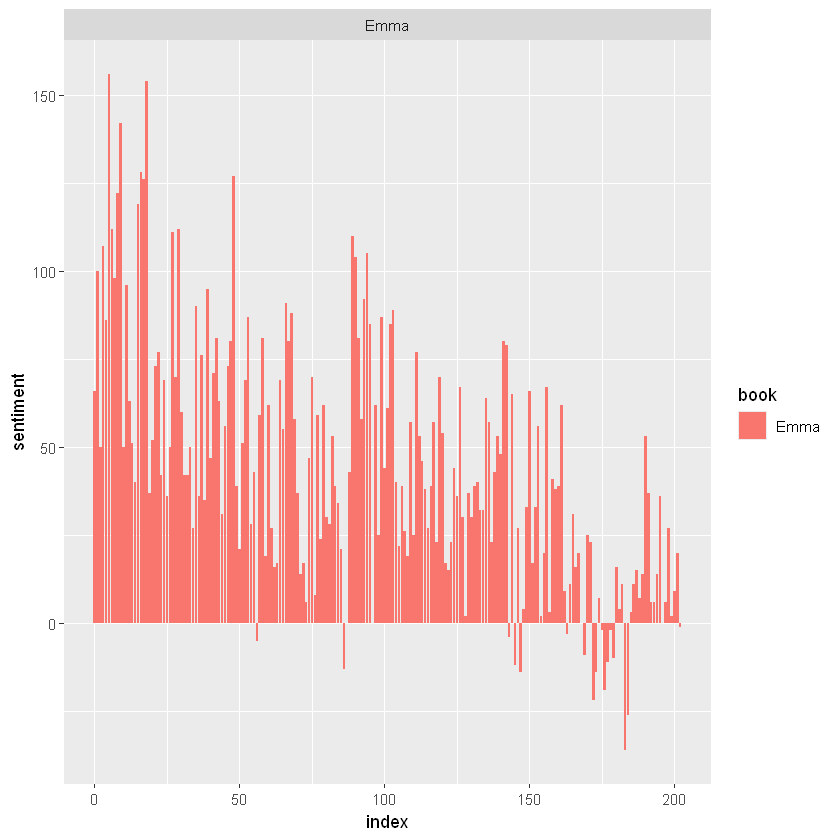

In [7]:
ggplot(Emma_sentiment, aes(index, sentiment, fill = book)) +
    geom_bar(stat = "identity", show.legend = TRUE) +
    facet_wrap(~book, ncol = 2, scales = "free_x")

In [8]:
counting_words <- tidy_data %>%
    inner_join(bing, relationship = "many-to-many") %>%
    count(word, sentiment, sort = TRUE)
head(counting_words)

Joining with `by = join_by(word)`


word,sentiment,n
<chr>,<chr>,<int>
miss,negative,1855
well,positive,1523
good,positive,1380
great,positive,981
like,positive,725
better,positive,639


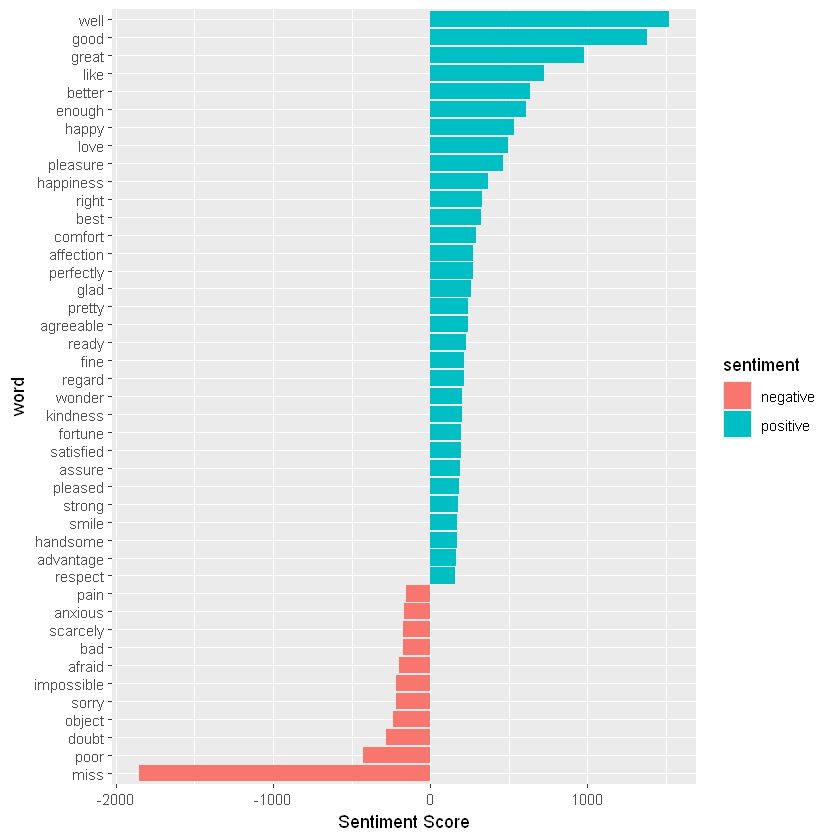

In [9]:
counting_words %>%
 filter(n > 150) %>%
 mutate(n = ifelse(sentiment == "negative", -n, n)) %>%
 mutate(word = reorder(word, n)) %>%
 ggplot(aes(word, n, fill = sentiment))+
 geom_col() +
 coord_flip() +
 labs(y = "Sentiment Score")

Joining with `by = join_by(word)`


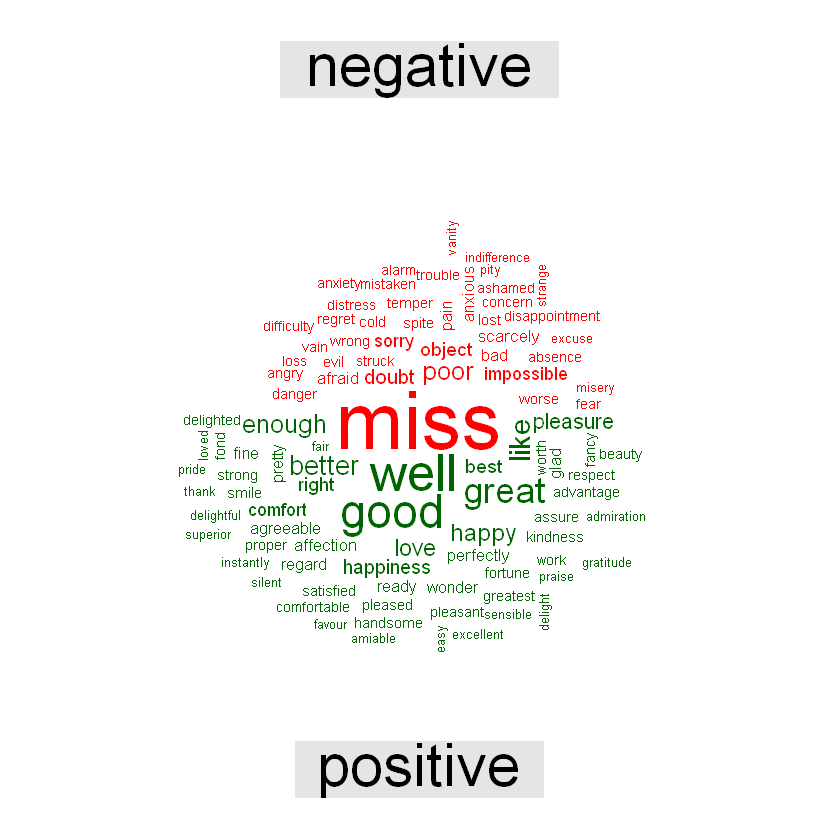

In [10]:
tidy_data %>%
 inner_join(bing, relationship = "many-to-many") %>%
 count(word, sentiment, sort = TRUE) %>%
 acast(word ~ sentiment, value.var = "n", fill = 0) %>%
 comparison.cloud(colors = c("red", "dark green"),
          max.words = 100)